In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [29]:
df=pd.read_csv("data.csv")

In [30]:
df

,Unnamed: 0,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Lot_no,Kilometer,Price
0,0,Chevrolet,aveo,2009,Manual,1150,2,Petrol,6,200,975000
1,1,Chevrolet,captiva,2015,Automatic,2000,4,Diesel,8,100,3000000
2,2,Chevrolet,aveo,2009,Manual,1150,2,Petrol,6,42000,975000
3,3,Chevrolet,captiva,2010,Automatic,2000,4,Diesel,8,51000,3000000
4,4,Chevrolet,spark,2012,Manual,1000,2,Petrol,9,38000,1000000
...,...,...,...,...,...,...,...,...,...,...,...
1894,2209,Volkswagen,polo,2013,Manual,1600,2,Petrol,11,6300,2700000
1895,2210,Volkswagen,beetle,2010,Manual,1595,2,Petrol,8,19000,3950000
1896,2211,Volkswagen,passat,2010,Manual,1800,2,Petrol,8,11000,5800000
1897,2213,Volkswagen,tiguan,2010,Manual,2000,2,Petrol,8,25000,4900000


In [31]:
df.loc[2,"Brand"]="rajiv"

In [32]:

df

,Unnamed: 0,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Lot_no,Kilometer,Price
0,0,Chevrolet,aveo,2009,Manual,1150,2,Petrol,6,200,975000
1,1,Chevrolet,captiva,2015,Automatic,2000,4,Diesel,8,100,3000000
2,2,rajiv,aveo,2009,Manual,1150,2,Petrol,6,42000,975000
3,3,Chevrolet,captiva,2010,Automatic,2000,4,Diesel,8,51000,3000000
4,4,Chevrolet,spark,2012,Manual,1000,2,Petrol,9,38000,1000000
...,...,...,...,...,...,...,...,...,...,...,...
1894,2209,Volkswagen,polo,2013,Manual,1600,2,Petrol,11,6300,2700000
1895,2210,Volkswagen,beetle,2010,Manual,1595,2,Petrol,8,19000,3950000
1896,2211,Volkswagen,passat,2010,Manual,1800,2,Petrol,8,11000,5800000
1897,2213,Volkswagen,tiguan,2010,Manual,2000,2,Petrol,8,25000,4900000


In [33]:
newdf=df.drop(df.iloc[:,0:8],axis=1)

In [34]:
newdf

,Lot_no,Kilometer,Price
0,6,200,975000
1,8,100,3000000
2,6,42000,975000
3,8,51000,3000000
4,9,38000,1000000
...,...,...,...
1894,11,6300,2700000
1895,8,19000,3950000
1896,8,11000,5800000
1897,8,25000,4900000


C:\Users\MR.D\anaconda3\envs\10daysml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lot_no', ylabel='Price'>

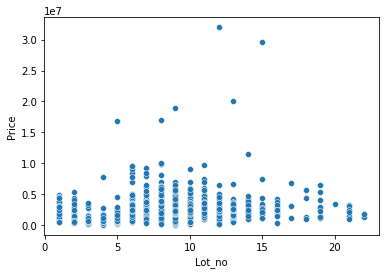

In [14]:
sns.scatterplot(newdf['Lot_no'],newdf['Price'])

In [35]:
scaler = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newdf.drop('Price', axis=1),
                                                    newdf['Price'],
                             
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape,X_test.shape

((1329, 2), (570, 2))

In [37]:
scaler.fit(X_train)

StandardScaler()

#generally fit means learning : in this case learning is calculating mean and standard deviation 

In [38]:
scaler.mean_

array([8.33408578e+00, 4.11489631e+04])

# transforming to origin (all the points)

In [39]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled.shape,X_test_scaled.shape


((1329, 2), (570, 2))

# generally transform gives you numpy array so change it to df

In [40]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [41]:
np.round(X_train.describe())

,Lot_no,Kilometer
count,1329.0,1329.0
mean,8.0,41149.0
std,3.0,41016.0
min,1.0,150.0
25%,6.0,25000.0
50%,8.0,36000.0
75%,10.0,50000.0
max,22.0,800000.0


In [42]:
np.round(X_train_scaled.describe())

,Lot_no,Kilometer
count,1329.0,1329.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.0
25%,-1.0,-0.0
50%,-0.0,-0.0
75%,1.0,0.0
max,4.0,19.0


C:\Users\MR.D\anaconda3\envs\10daysml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lot_no', ylabel='Kilometer'>

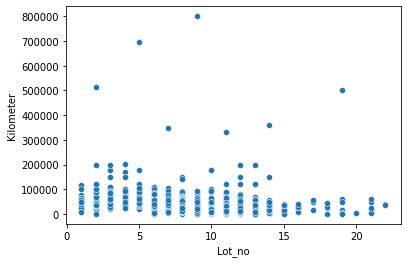

In [97]:
sns.scatterplot(newdf['Lot_no'],newdf['Kilometer'])

C:\Users\MR.D\anaconda3\envs\10daysml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lot_no', ylabel='Kilometer'>

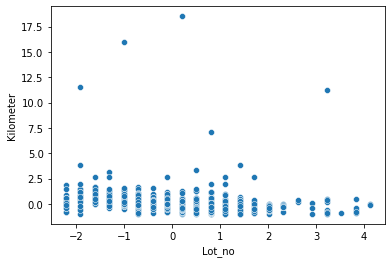

In [99]:
sns.scatterplot(X_train_scaled['Lot_no'],X_train_scaled['Kilometer'])